In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 1024.", name="epoch 500")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(1024, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=500, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1024)              1051648   
                                                                 
 dense (Dense)               (None, 25)                25625     
                                                                 
Total params: 1,077,273
Trainable params: 1,077,273
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/500
4/5 [=======================>......] - ETA: 0s - loss: 1.0405 - mae: 0.8383INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 653ms/step - loss: 1.0500 - mae: 0.8415 - val_loss: 2.1039 - val_mae: 1.2827
Epoch 2/500
4/5 [=======================>......] - ETA: 0s - loss: 3.8495 - mae: 1.7263INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 532ms/step - loss: 3.6869 - mae: 1.6804 - val_loss: 1.7002 - val_mae: 1.1262
Epoch 3/500
5/5 [==============================] - ETA: 0s - loss: 2.4353 - mae: 1.3455INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 511ms/step - loss: 2.4353 - mae: 1.3455 - val_loss: 0.3831 - val_mae: 0.5053
Epoch 4/500
5/5 [==============================] - 1s 169ms/step - loss: 2.2901 - mae: 1.0940 - val_loss: 0.5881 - val_mae: 0.6134
Epoch 5/500
5/5 [==============================] - 1s 154ms/step - loss: 0.6620 - mae: 0.6622 - val_loss: 3.4770 - val_mae: 1.7897
Epoch 6/500
5/5 [==============================] - 1s 152ms/step - loss: 2.0967 - mae: 1.2340 - val_loss: 0.6964 - val_mae: 0.6989
Epoch 7/500
5/5 [==============================] - 1s 149ms/step - loss: 1.5864 - mae: 1.0988 - val_loss: 0.9945 - val_mae: 0.8911
Epoch 8/500
5/5 [==============================] - ETA: 0s - loss: 0.6921 - mae: 0.6809INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 519ms/step - loss: 0.6921 - mae: 0.6809 - val_loss: 0.3128 - val_mae: 0.4583
Epoch 9/500
5/5 [==============================] - 1s 199ms/step - loss: 0.5633 - mae: 0.6039 - val_loss: 0.9334 - val_mae: 0.8468
Epoch 10/500
5/5 [==============================] - ETA: 0s - loss: 0.6557 - mae: 0.6798INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.6557 - mae: 0.6798 - val_loss: 0.2309 - val_mae: 0.3942
Epoch 11/500
5/5 [==============================] - 1s 170ms/step - loss: 0.3142 - mae: 0.4508 - val_loss: 0.3985 - val_mae: 0.5131
Epoch 12/500
5/5 [==============================] - ETA: 0s - loss: 0.3237 - mae: 0.4602INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.3237 - mae: 0.4602 - val_loss: 0.2265 - val_mae: 0.3945
Epoch 13/500
5/5 [==============================] - 1s 183ms/step - loss: 0.2420 - mae: 0.4064 - val_loss: 0.2568 - val_mae: 0.4141
Epoch 14/500
4/5 [=======================>......] - ETA: 0s - loss: 0.2275 - mae: 0.3926INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 517ms/step - loss: 0.2226 - mae: 0.3882 - val_loss: 0.1909 - val_mae: 0.3617
Epoch 15/500
5/5 [==============================] - ETA: 0s - loss: 0.2069 - mae: 0.3719INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 517ms/step - loss: 0.2069 - mae: 0.3719 - val_loss: 0.1869 - val_mae: 0.3585
Epoch 16/500
5/5 [==============================] - ETA: 0s - loss: 0.1906 - mae: 0.3568INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 563ms/step - loss: 0.1906 - mae: 0.3568 - val_loss: 0.1789 - val_mae: 0.3434
Epoch 17/500
5/5 [==============================] - ETA: 0s - loss: 0.1762 - mae: 0.3414INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 514ms/step - loss: 0.1762 - mae: 0.3414 - val_loss: 0.1519 - val_mae: 0.3139
Epoch 18/500
5/5 [==============================] - ETA: 0s - loss: 0.1502 - mae: 0.3104INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.1502 - mae: 0.3104 - val_loss: 0.1363 - val_mae: 0.2966
Epoch 19/500
5/5 [==============================] - 1s 163ms/step - loss: 0.1372 - mae: 0.2933 - val_loss: 0.1374 - val_mae: 0.2968
Epoch 20/500
5/5 [==============================] - ETA: 0s - loss: 0.1292 - mae: 0.2857INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 512ms/step - loss: 0.1292 - mae: 0.2857 - val_loss: 0.1330 - val_mae: 0.2903
Epoch 21/500
5/5 [==============================] - ETA: 0s - loss: 0.1287 - mae: 0.2838INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 521ms/step - loss: 0.1287 - mae: 0.2838 - val_loss: 0.1283 - val_mae: 0.2832
Epoch 22/500
5/5 [==============================] - 1s 187ms/step - loss: 0.1255 - mae: 0.2778 - val_loss: 0.1358 - val_mae: 0.2895
Epoch 23/500
5/5 [==============================] - 1s 158ms/step - loss: 0.1200 - mae: 0.2721 - val_loss: 0.1348 - val_mae: 0.2887
Epoch 24/500
5/5 [==============================] - 1s 158ms/step - loss: 0.1205 - mae: 0.2726 - val_loss: 0.1296 - val_mae: 0.2820
Epoch 25/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1195 - mae: 0.2709 - val_loss: 0.1343 - val_mae: 0.2892
Epoch 26/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1200 - mae: 0.2716 - val_loss: 0.1308 - val_mae: 0.2850
Epoch 27/500
5/5 [==============================] - 1s 153ms/step - loss: 0.1199 - mae: 0.2723 - val_loss: 0.1337 - val_mae: 0.2892
Epoch 28/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1223 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 519ms/step - loss: 0.1224 - mae: 0.2759 - val_loss: 0.1265 - val_mae: 0.2803
Epoch 44/500
5/5 [==============================] - 1s 166ms/step - loss: 0.1222 - mae: 0.2739 - val_loss: 0.1340 - val_mae: 0.2880
Epoch 45/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1197 - mae: 0.2726 - val_loss: 0.1376 - val_mae: 0.2929
Epoch 46/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1228 - mae: 0.2754 - val_loss: 0.1285 - val_mae: 0.2824
Epoch 47/500
5/5 [==============================] - 1s 153ms/step - loss: 0.1192 - mae: 0.2709 - val_loss: 0.1423 - val_mae: 0.3010
Epoch 48/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1215 - mae: 0.2754 - val_loss: 0.1294 - val_mae: 0.2834
Epoch 49/500
5/5 [==============================] - 1s 150ms/step - loss: 0.1203 - mae: 0.2713 - val_loss: 0.1292 - val_mae: 0.2830
Epoch 50/500
5/5 [==============================] - 1s 147ms/step - loss: 0.1194 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 513ms/step - loss: 0.1251 - mae: 0.2792 - val_loss: 0.1254 - val_mae: 0.2779
Epoch 85/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1295 - mae: 0.2830 - val_loss: 0.1342 - val_mae: 0.2887
Epoch 86/500
5/5 [==============================] - 1s 153ms/step - loss: 0.1317 - mae: 0.2885 - val_loss: 0.1377 - val_mae: 0.2955
Epoch 87/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1260 - mae: 0.2789 - val_loss: 0.1272 - val_mae: 0.2800
Epoch 88/500
5/5 [==============================] - 1s 147ms/step - loss: 0.1302 - mae: 0.2834 - val_loss: 0.1346 - val_mae: 0.2904
Epoch 89/500
5/5 [==============================] - 1s 150ms/step - loss: 0.1241 - mae: 0.2778 - val_loss: 0.1281 - val_mae: 0.2844
Epoch 90/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1260 - mae: 0.2795 - val_loss: 0.1348 - val_mae: 0.2910
Epoch 91/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1297 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 504ms/step - loss: 0.1225 - mae: 0.2754 - val_loss: 0.1252 - val_mae: 0.2782
Epoch 93/500
5/5 [==============================] - 1s 179ms/step - loss: 0.1263 - mae: 0.2788 - val_loss: 0.1376 - val_mae: 0.2942
Epoch 94/500
5/5 [==============================] - 1s 159ms/step - loss: 0.1261 - mae: 0.2802 - val_loss: 0.1272 - val_mae: 0.2833
Epoch 95/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1299 - mae: 0.2839 - val_loss: 0.1302 - val_mae: 0.2838
Epoch 96/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1232 - mae: 0.2771 - val_loss: 0.1328 - val_mae: 0.2891
Epoch 97/500
5/5 [==============================] - 1s 147ms/step - loss: 0.1215 - mae: 0.2743 - val_loss: 0.1254 - val_mae: 0.2794
Epoch 98/500
5/5 [==============================] - 1s 148ms/step - loss: 0.1266 - mae: 0.2788 - val_loss: 0.1383 - val_mae: 0.2953
Epoch 99/500
5/5 [==============================] - 1s 150ms/step - loss: 0.1413 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.1281 - mae: 0.2840 - val_loss: 0.1232 - val_mae: 0.2754
Epoch 108/500
5/5 [==============================] - 1s 178ms/step - loss: 0.1260 - mae: 0.2799 - val_loss: 0.1333 - val_mae: 0.2885
Epoch 109/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1255 - mae: 0.2792 - val_loss: 0.1257 - val_mae: 0.2802
Epoch 110/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1269 - mae: 0.2819 - val_loss: 0.1302 - val_mae: 0.2858
Epoch 111/500
5/5 [==============================] - 1s 148ms/step - loss: 0.1245 - mae: 0.2782 - val_loss: 0.1281 - val_mae: 0.2816
Epoch 112/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1270 - mae: 0.2816 - val_loss: 0.1275 - val_mae: 0.2811
Epoch 113/500
5/5 [==============================] - 1s 150ms/step - loss: 0.1233 - mae: 0.2755 - val_loss: 0.1348 - val_mae: 0.2908
Epoch 114/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1355 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 494ms/step - loss: 0.1269 - mae: 0.2808 - val_loss: 0.1213 - val_mae: 0.2725
Epoch 132/500
5/5 [==============================] - 1s 174ms/step - loss: 0.1240 - mae: 0.2764 - val_loss: 0.1232 - val_mae: 0.2756
Epoch 133/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1261 - mae: 0.2806 - val_loss: 0.1217 - val_mae: 0.2754
Epoch 134/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1300 - mae: 0.2832 - val_loss: 0.1272 - val_mae: 0.2797
Epoch 135/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1277 - mae: 0.2818 - val_loss: 0.1245 - val_mae: 0.2800
Epoch 136/500
5/5 [==============================] - 1s 157ms/step - loss: 0.1271 - mae: 0.2807 - val_loss: 0.1323 - val_mae: 0.2872
Epoch 137/500
5/5 [==============================] - 1s 159ms/step - loss: 0.1263 - mae: 0.2812 - val_loss: 0.1266 - val_mae: 0.2796
Epoch 138/500
5/5 [==============================] - 1s 157ms/step - loss: 0.1286 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.1266 - mae: 0.2824 - val_loss: 0.1192 - val_mae: 0.2724
Epoch 163/500
5/5 [==============================] - 1s 181ms/step - loss: 0.1235 - mae: 0.2764 - val_loss: 0.1204 - val_mae: 0.2723
Epoch 164/500
5/5 [==============================] - 1s 153ms/step - loss: 0.1222 - mae: 0.2750 - val_loss: 0.1337 - val_mae: 0.2918
Epoch 165/500
5/5 [==============================] - 1s 155ms/step - loss: 0.1297 - mae: 0.2843 - val_loss: 0.1290 - val_mae: 0.2851
Epoch 166/500
5/5 [==============================] - 1s 156ms/step - loss: 0.1262 - mae: 0.2803 - val_loss: 0.1238 - val_mae: 0.2797
Epoch 167/500
5/5 [==============================] - 1s 154ms/step - loss: 0.1243 - mae: 0.2794 - val_loss: 0.1336 - val_mae: 0.2933
Epoch 168/500
5/5 [==============================] - 1s 150ms/step - loss: 0.1230 - mae: 0.2783 - val_loss: 0.1241 - val_mae: 0.2816
Epoch 169/500
5/5 [==============================] - 1s 146ms/step - loss: 0.1244 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 501ms/step - loss: 0.1267 - mae: 0.2831 - val_loss: 0.1168 - val_mae: 0.2707
Epoch 198/500
5/5 [==============================] - 1s 182ms/step - loss: 0.1205 - mae: 0.2735 - val_loss: 0.1289 - val_mae: 0.2907
Epoch 199/500
5/5 [==============================] - 1s 148ms/step - loss: 0.1276 - mae: 0.2839 - val_loss: 0.1944 - val_mae: 0.3582
Epoch 200/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1303 - mae: 0.2886 - val_loss: 0.1215 - val_mae: 0.2772
Epoch 201/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1251 - mae: 0.2777 - val_loss: 0.1231 - val_mae: 0.2836
Epoch 202/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1193 - mae: 0.2746 - val_loss: 0.1301 - val_mae: 0.2883
Epoch 203/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1160 - mae: 0.2680 - val_loss: 0.1211 - val_mae: 0.2761
Epoch 204/500
5/5 [==============================] - 1s 150ms/step - loss: 0.1196 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 0.1210 - mae: 0.2778 - val_loss: 0.1120 - val_mae: 0.2691
Epoch 213/500
5/5 [==============================] - 1s 176ms/step - loss: 0.1132 - mae: 0.2678 - val_loss: 0.1141 - val_mae: 0.2694
Epoch 214/500
5/5 [==============================] - 1s 153ms/step - loss: 0.1105 - mae: 0.2622 - val_loss: 0.1164 - val_mae: 0.2700
Epoch 215/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1123 - mae: 0.2662 - val_loss: 0.1170 - val_mae: 0.2748
Epoch 216/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1098 - mae: 0.2625 - val_loss: 0.2143 - val_mae: 0.3758
Epoch 217/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1642 - mae: 0.3224 - val_loss: 0.1229 - val_mae: 0.2775
Epoch 218/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1574 - mae: 0.3107 - val_loss: 0.1957 - val_mae: 0.3511
Epoch 219/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1564 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 533ms/step - loss: 0.1136 - mae: 0.2673 - val_loss: 0.1117 - val_mae: 0.2668
Epoch 225/500
5/5 [==============================] - 1s 159ms/step - loss: 0.1109 - mae: 0.2637 - val_loss: 0.1283 - val_mae: 0.2825
Epoch 226/500
5/5 [==============================] - 1s 155ms/step - loss: 0.1140 - mae: 0.2674 - val_loss: 0.1251 - val_mae: 0.2799
Epoch 227/500
5/5 [==============================] - 1s 153ms/step - loss: 0.1125 - mae: 0.2646 - val_loss: 0.1126 - val_mae: 0.2687
Epoch 228/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1101 - mae: 0.2633 - val_loss: 0.1189 - val_mae: 0.2763
Epoch 229/500
5/5 [==============================] - 1s 153ms/step - loss: 0.1221 - mae: 0.2770 - val_loss: 0.1282 - val_mae: 0.2846
Epoch 230/500
5/5 [==============================] - 1s 156ms/step - loss: 0.1093 - mae: 0.2626 - val_loss: 0.1144 - val_mae: 0.2699
Epoch 231/500
5/5 [==============================] - 1s 156ms/step - loss: 0.1088 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 548ms/step - loss: 0.1084 - mae: 0.2620 - val_loss: 0.1067 - val_mae: 0.2577
Epoch 233/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1105 - mae: 0.2643 - val_loss: 0.1195 - val_mae: 0.2802
Epoch 234/500
5/5 [==============================] - 1s 156ms/step - loss: 0.1124 - mae: 0.2675 - val_loss: 0.1069 - val_mae: 0.2599
Epoch 235/500
5/5 [==============================] - ETA: 0s - loss: 0.1110 - mae: 0.2642INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.1110 - mae: 0.2642 - val_loss: 0.1060 - val_mae: 0.2585
Epoch 236/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1081 - mae: 0.2596 - val_loss: 0.1095 - val_mae: 0.2642
Epoch 237/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1122 - mae: 0.2680 - val_loss: 0.1126 - val_mae: 0.2675
Epoch 238/500
5/5 [==============================] - ETA: 0s - loss: 0.1044 - mae: 0.2556INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 504ms/step - loss: 0.1044 - mae: 0.2556 - val_loss: 0.1003 - val_mae: 0.2510
Epoch 239/500
5/5 [==============================] - 1s 175ms/step - loss: 0.1082 - mae: 0.2589 - val_loss: 0.1325 - val_mae: 0.2941
Epoch 240/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1343 - mae: 0.2909 - val_loss: 0.1090 - val_mae: 0.2649
Epoch 241/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1132 - mae: 0.2662 - val_loss: 0.1129 - val_mae: 0.2691
Epoch 242/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1143 - mae: 0.2676 - val_loss: 0.1746 - val_mae: 0.3356
Epoch 243/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1199 - mae: 0.2755 - val_loss: 0.1155 - val_mae: 0.2684
Epoch 244/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1066 - mae: 0.2597 - val_loss: 0.1057 - val_mae: 0.2612
Epoch 245/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1076 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 546ms/step - loss: 0.1095 - mae: 0.2632 - val_loss: 0.1003 - val_mae: 0.2537
Epoch 247/500
5/5 [==============================] - 1s 193ms/step - loss: 0.1097 - mae: 0.2638 - val_loss: 0.1119 - val_mae: 0.2729
Epoch 248/500
4/5 [=======================>......] - ETA: 0s - loss: 0.1066 - mae: 0.2605INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 0.1070 - mae: 0.2611 - val_loss: 0.0972 - val_mae: 0.2481
Epoch 249/500
5/5 [==============================] - 1s 180ms/step - loss: 0.1058 - mae: 0.2595 - val_loss: 0.1006 - val_mae: 0.2516
Epoch 250/500
5/5 [==============================] - 1s 148ms/step - loss: 0.1005 - mae: 0.2520 - val_loss: 0.1265 - val_mae: 0.2887
Epoch 251/500
5/5 [==============================] - 1s 145ms/step - loss: 0.1030 - mae: 0.2546 - val_loss: 0.1170 - val_mae: 0.2705
Epoch 252/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1087 - mae: 0.2598 - val_loss: 0.1350 - val_mae: 0.2966
Epoch 253/500
5/5 [==============================] - 1s 150ms/step - loss: 0.1192 - mae: 0.2750 - val_loss: 0.1883 - val_mae: 0.3512
Epoch 254/500
5/5 [==============================] - 1s 153ms/step - loss: 0.1442 - mae: 0.3009 - val_loss: 0.1627 - val_mae: 0.3254
Epoch 255/500
5/5 [==============================] - 1s 153ms/step - loss: 0.1287 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 498ms/step - loss: 0.1262 - mae: 0.2827 - val_loss: 0.0964 - val_mae: 0.2463
Epoch 263/500
5/5 [==============================] - ETA: 0s - loss: 0.1068 - mae: 0.2595INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 534ms/step - loss: 0.1068 - mae: 0.2595 - val_loss: 0.0883 - val_mae: 0.2355
Epoch 264/500
5/5 [==============================] - 1s 182ms/step - loss: 0.0962 - mae: 0.2462 - val_loss: 0.0960 - val_mae: 0.2491
Epoch 265/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0997 - mae: 0.2505 - val_loss: 0.0977 - val_mae: 0.2469
Epoch 266/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0966 - mae: 0.2461 - val_loss: 0.0894 - val_mae: 0.2373
Epoch 267/500
5/5 [==============================] - 1s 158ms/step - loss: 0.0966 - mae: 0.2474 - val_loss: 0.0937 - val_mae: 0.2417
Epoch 268/500
5/5 [==============================] - 1s 156ms/step - loss: 0.0910 - mae: 0.2396 - val_loss: 0.1391 - val_mae: 0.2985
Epoch 269/500
5/5 [==============================] - 1s 154ms/step - loss: 0.1050 - mae: 0.2571 - val_loss: 0.1873 - val_mae: 0.3548
Epoch 270/500
5/5 [==============================] - ETA: 0s - loss: 0.1051 - mae: 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.1051 - mae: 0.2572 - val_loss: 0.0879 - val_mae: 0.2344
Epoch 271/500
5/5 [==============================] - 1s 176ms/step - loss: 0.0939 - mae: 0.2419 - val_loss: 0.0972 - val_mae: 0.2516
Epoch 272/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1110 - mae: 0.2674 - val_loss: 0.0930 - val_mae: 0.2412
Epoch 273/500
5/5 [==============================] - 1s 152ms/step - loss: 0.1028 - mae: 0.2537 - val_loss: 0.0986 - val_mae: 0.2490
Epoch 274/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0923 - mae: 0.2392 - val_loss: 0.0889 - val_mae: 0.2365
Epoch 275/500
5/5 [==============================] - 1s 150ms/step - loss: 0.1002 - mae: 0.2500 - val_loss: 0.0889 - val_mae: 0.2388
Epoch 276/500
5/5 [==============================] - ETA: 0s - loss: 0.0933 - mae: 0.2404INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 506ms/step - loss: 0.0933 - mae: 0.2404 - val_loss: 0.0872 - val_mae: 0.2365
Epoch 277/500
5/5 [==============================] - 1s 185ms/step - loss: 0.0901 - mae: 0.2387 - val_loss: 0.0986 - val_mae: 0.2533
Epoch 278/500
5/5 [==============================] - 1s 159ms/step - loss: 0.1002 - mae: 0.2533 - val_loss: 0.1091 - val_mae: 0.2685
Epoch 279/500
5/5 [==============================] - 1s 158ms/step - loss: 0.0987 - mae: 0.2503 - val_loss: 0.0892 - val_mae: 0.2411
Epoch 280/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0985 - mae: 0.2497INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 525ms/step - loss: 0.0983 - mae: 0.2495 - val_loss: 0.0861 - val_mae: 0.2350
Epoch 281/500
5/5 [==============================] - ETA: 0s - loss: 0.1035 - mae: 0.2541INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 513ms/step - loss: 0.1035 - mae: 0.2541 - val_loss: 0.0836 - val_mae: 0.2268
Epoch 282/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1011 - mae: 0.2503 - val_loss: 0.1024 - val_mae: 0.2581
Epoch 283/500
5/5 [==============================] - 1s 148ms/step - loss: 0.1155 - mae: 0.2709 - val_loss: 0.1494 - val_mae: 0.3152
Epoch 284/500
5/5 [==============================] - 1s 148ms/step - loss: 0.1468 - mae: 0.3062 - val_loss: 0.1842 - val_mae: 0.3489
Epoch 285/500
5/5 [==============================] - 1s 149ms/step - loss: 0.1490 - mae: 0.3089 - val_loss: 0.1039 - val_mae: 0.2599
Epoch 286/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1404 - mae: 0.2971 - val_loss: 0.1618 - val_mae: 0.3230
Epoch 287/500
5/5 [==============================] - 1s 151ms/step - loss: 0.1137 - mae: 0.2696 - val_loss: 0.1037 - val_mae: 0.2571
Epoch 288/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0992 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0887 - mae: 0.2362 - val_loss: 0.0824 - val_mae: 0.2279
Epoch 296/500
5/5 [==============================] - 1s 177ms/step - loss: 0.0837 - mae: 0.2294 - val_loss: 0.0877 - val_mae: 0.2304
Epoch 297/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0864 - mae: 0.2332 - val_loss: 0.1218 - val_mae: 0.2786
Epoch 298/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0966 - mae: 0.2460 - val_loss: 0.1120 - val_mae: 0.2679
Epoch 299/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0982 - mae: 0.2482 - val_loss: 0.0843 - val_mae: 0.2266
Epoch 300/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0863 - mae: 0.2298INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 517ms/step - loss: 0.0867 - mae: 0.2313 - val_loss: 0.0800 - val_mae: 0.2266
Epoch 301/500
5/5 [==============================] - 1s 190ms/step - loss: 0.0917 - mae: 0.2390 - val_loss: 0.1089 - val_mae: 0.2663
Epoch 302/500
5/5 [==============================] - 1s 153ms/step - loss: 0.1090 - mae: 0.2633 - val_loss: 0.0993 - val_mae: 0.2541
Epoch 303/500
5/5 [==============================] - ETA: 0s - loss: 0.0919 - mae: 0.2377INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.0919 - mae: 0.2377 - val_loss: 0.0771 - val_mae: 0.2181
Epoch 304/500
5/5 [==============================] - 1s 178ms/step - loss: 0.0917 - mae: 0.2375 - val_loss: 0.0860 - val_mae: 0.2356
Epoch 305/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0997 - mae: 0.2492 - val_loss: 0.0802 - val_mae: 0.2221
Epoch 306/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0867 - mae: 0.2332 - val_loss: 0.0911 - val_mae: 0.2374
Epoch 307/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0821 - mae: 0.2244 - val_loss: 0.0813 - val_mae: 0.2236
Epoch 308/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0795 - mae: 0.2217 - val_loss: 0.0822 - val_mae: 0.2221
Epoch 309/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0788 - mae: 0.2189 - val_loss: 0.0822 - val_mae: 0.2245
Epoch 310/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0791 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 543ms/step - loss: 0.0799 - mae: 0.2222 - val_loss: 0.0752 - val_mae: 0.2162
Epoch 314/500
5/5 [==============================] - ETA: 0s - loss: 0.0826 - mae: 0.2237INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 534ms/step - loss: 0.0826 - mae: 0.2237 - val_loss: 0.0744 - val_mae: 0.2172
Epoch 315/500
5/5 [==============================] - 1s 181ms/step - loss: 0.0771 - mae: 0.2173 - val_loss: 0.0775 - val_mae: 0.2177
Epoch 316/500
5/5 [==============================] - 1s 145ms/step - loss: 0.0791 - mae: 0.2199 - val_loss: 0.0759 - val_mae: 0.2199
Epoch 317/500
5/5 [==============================] - 1s 147ms/step - loss: 0.0844 - mae: 0.2311 - val_loss: 0.1201 - val_mae: 0.2770
Epoch 318/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0963 - mae: 0.2434 - val_loss: 0.1097 - val_mae: 0.2640
Epoch 319/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0859 - mae: 0.2315 - val_loss: 0.1023 - val_mae: 0.2510
Epoch 320/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0827 - mae: 0.2269 - val_loss: 0.0877 - val_mae: 0.2331
Epoch 321/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0806 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 509ms/step - loss: 0.0785 - mae: 0.2216 - val_loss: 0.0705 - val_mae: 0.2088
Epoch 325/500
5/5 [==============================] - 1s 175ms/step - loss: 0.0785 - mae: 0.2189 - val_loss: 0.0795 - val_mae: 0.2245
Epoch 326/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0827 - mae: 0.2274 - val_loss: 0.0816 - val_mae: 0.2242
Epoch 327/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0767 - mae: 0.2164 - val_loss: 0.0754 - val_mae: 0.2142
Epoch 328/500
5/5 [==============================] - 1s 146ms/step - loss: 0.0843 - mae: 0.2282 - val_loss: 0.0887 - val_mae: 0.2306
Epoch 329/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0887 - mae: 0.2360 - val_loss: 0.1164 - val_mae: 0.2775
Epoch 330/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0866 - mae: 0.2325 - val_loss: 0.1027 - val_mae: 0.2507
Epoch 331/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0871 -

Epoch 386/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0836 - mae: 0.2287 - val_loss: 0.1002 - val_mae: 0.2493
Epoch 387/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0865 - mae: 0.2312 - val_loss: 0.0874 - val_mae: 0.2280
Epoch 388/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0864 - mae: 0.2283 - val_loss: 0.0762 - val_mae: 0.2147
Epoch 389/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0771 - mae: 0.2142 - val_loss: 0.0763 - val_mae: 0.2203
Epoch 390/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0767 - mae: 0.2161 - val_loss: 0.0709 - val_mae: 0.2079
Epoch 391/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0747 - mae: 0.2135 - val_loss: 0.0747 - val_mae: 0.2105
Epoch 392/500
5/5 [==============================] - 1s 148ms/step - loss: 0.0838 - mae: 0.2312 - val_loss: 0.0896 - val_mae: 0.2325
Epoch 393/500
5/5 [==============================] - 1s 152ms/step - 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0788 - mae: 0.2226 - val_loss: 0.0701 - val_mae: 0.2023
Epoch 422/500
5/5 [==============================] - 1s 177ms/step - loss: 0.0733 - mae: 0.2114 - val_loss: 0.0715 - val_mae: 0.2057
Epoch 423/500
5/5 [==============================] - 1s 155ms/step - loss: 0.0739 - mae: 0.2135 - val_loss: 0.0722 - val_mae: 0.2106
Epoch 424/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0770 - mae: 0.2185 - val_loss: 0.0752 - val_mae: 0.2119
Epoch 425/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0736 - mae: 0.2127 - val_loss: 0.0777 - val_mae: 0.2209
Epoch 426/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0789 - mae: 0.2220INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 523ms/step - loss: 0.0806 - mae: 0.2242 - val_loss: 0.0685 - val_mae: 0.2035
Epoch 427/500
5/5 [==============================] - 1s 182ms/step - loss: 0.0753 - mae: 0.2132 - val_loss: 0.0768 - val_mae: 0.2152
Epoch 428/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0726 - mae: 0.2125 - val_loss: 0.0931 - val_mae: 0.2329
Epoch 429/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0753 - mae: 0.2141 - val_loss: 0.0788 - val_mae: 0.2194
Epoch 430/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0757 - mae: 0.2169 - val_loss: 0.0749 - val_mae: 0.2136
Epoch 431/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0731 - mae: 0.2119 - val_loss: 0.0718 - val_mae: 0.2079
Epoch 432/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0742 - mae: 0.2116 - val_loss: 0.0718 - val_mae: 0.2074
Epoch 433/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0747 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 507ms/step - loss: 0.0736 - mae: 0.2124 - val_loss: 0.0681 - val_mae: 0.2013
Epoch 476/500
5/5 [==============================] - 1s 182ms/step - loss: 0.0718 - mae: 0.2107 - val_loss: 0.0900 - val_mae: 0.2336
Epoch 477/500
5/5 [==============================] - 1s 154ms/step - loss: 0.0777 - mae: 0.2175 - val_loss: 0.0725 - val_mae: 0.2134
Epoch 478/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0768 - mae: 0.2173 - val_loss: 0.0814 - val_mae: 0.2287
Epoch 479/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0777 - mae: 0.2191 - val_loss: 0.0746 - val_mae: 0.2166
Epoch 480/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0783 - mae: 0.2195 - val_loss: 0.0782 - val_mae: 0.2175
Epoch 481/500
5/5 [==============================] - 1s 151ms/step - loss: 0.0804 - mae: 0.2261 - val_loss: 0.0885 - val_mae: 0.2304
Epoch 482/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0752 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 489ms/step - loss: 0.0704 - mae: 0.2068 - val_loss: 0.0644 - val_mae: 0.1981
Epoch 485/500
5/5 [==============================] - 1s 168ms/step - loss: 0.0676 - mae: 0.2016 - val_loss: 0.0657 - val_mae: 0.2019
Epoch 486/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0667 - mae: 0.2004 - val_loss: 0.0663 - val_mae: 0.1984
Epoch 487/500
5/5 [==============================] - ETA: 0s - loss: 0.0664 - mae: 0.2000INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_202009-2vru7228\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 524ms/step - loss: 0.0664 - mae: 0.2000 - val_loss: 0.0638 - val_mae: 0.1964
Epoch 488/500
5/5 [==============================] - 1s 187ms/step - loss: 0.0696 - mae: 0.2050 - val_loss: 0.0719 - val_mae: 0.2132
Epoch 489/500
5/5 [==============================] - 1s 150ms/step - loss: 0.0700 - mae: 0.2056 - val_loss: 0.0667 - val_mae: 0.2009
Epoch 490/500
5/5 [==============================] - 1s 149ms/step - loss: 0.0689 - mae: 0.2052 - val_loss: 0.0729 - val_mae: 0.2074
Epoch 491/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0658 - mae: 0.2001 - val_loss: 0.0677 - val_mae: 0.2011
Epoch 492/500
5/5 [==============================] - 1s 152ms/step - loss: 0.0673 - mae: 0.2040 - val_loss: 0.0711 - val_mae: 0.2071
Epoch 493/500
5/5 [==============================] - 1s 155ms/step - loss: 0.0667 - mae: 0.2014 - val_loss: 0.0666 - val_mae: 0.2020
Epoch 494/500
5/5 [==============================] - 1s 153ms/step - loss: 0.0723 -

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 94ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.6732839, 1.7146542, 1.6599629, 1.6593828, 1.6406229, 1.7087858,
        1.7266567, 1.8145314, 1.9599417, 1.9905659, 1.8125715, 1.993905 ,
        1.7477072, 1.8323991, 1.7711176, 1.782369 , 1.7855527, 1.8583702,
        1.8332909, 1.9121937, 2.0723724, 2.0911078, 1.8943528, 2.1428201,
        1.828358 ]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

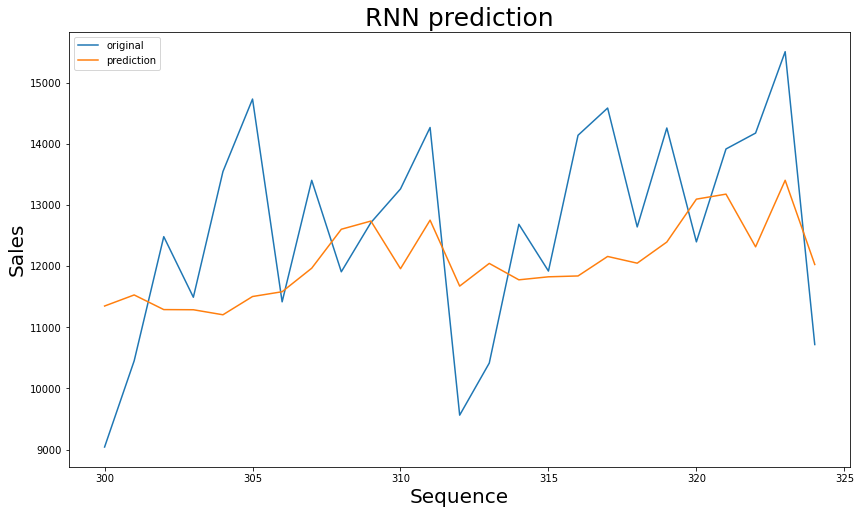

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 24ms/step - loss: 0.1335 - mae: 0.3117


[0.1335165947675705, 0.3117488920688629]